# Sentiment Analysis
We will be doing a sentiment analysis on the Tweets about SIA

## Scrap Twitter for SIA Sentiments
We will be using the scraperapi to scrap Tweets for the query text. 

Do note that the api is a free tier with limited access so use the generated JSON before re-running and only run when there is a need for it.

In [ ]:
import requests
import pandas as pd

In [13]:
twitter_data = []

payload = {
   'api_key': '<add your api key here>',
   'query': 'singapore airline',
   'num': '100'
}

In [14]:
response = requests.get(
   'https://api.scraperapi.com/structured/twitter/search', params=payload)
data = response.json()

In [15]:
all_tweets = data['tweets']
for tweet in all_tweets:
   twitter_data.append({
       'ID': tweet['tweet_id'],
       'User': tweet["user"],
       'Tweet': tweet["text"],
       'URL': tweet["link"]
   })

In [16]:
df = pd.DataFrame(twitter_data)
df.to_json('sia_tweets.json', orient='index')
print('Tweets exported to JSON')

Tweets exported to JSON


## Convert JSON

In [17]:
import json

In [19]:
with open('sia_tweets.json', 'r') as file:
    data = json.load(file)

In [26]:
tweet_texts = []

for tweet_id, tweet_data in data.items():
    text = tweet_data['Tweet']
    tweet_texts.append(text)

In [30]:
!pip install textblob

     ------------------------------------- 636.8/636.8 kB 13.3 MB/s eta 0:00:00


In [31]:
from textblob import TextBlob

In [32]:
sentiments = []

for text in tweet_texts:
    blob = TextBlob(text)
    sentiment = blob.sentiment.polarity
    sentiments.append(sentiment)

In [33]:
print(sentiments)

[-0.5, 0.0909090909090909, 0.0, 0.0, 0.24675324675324675, 0.0, 0.0, -0.6024999999999999, 0.0, 0.5, 0.0, 0.65, 0.11818181818181818, -0.19, 0.0, 0.0, 0.0, -0.175, 0.0, 0.0, 0.0, 0.0, 0.13636363636363635, 0.0, 0.19318181818181818, 0.0, 0.0, 0.21153846153846154, 0.75, 0.0, 0.13636363636363635, -0.5, 0.0, 0.0, 0.0, -0.3, -0.19999999999999996, 0.1, 0.0, 0.0, -0.19999999999999996, 0.0, 0.0, 0.125, 0.5, 0.0, 0.0, -0.125, 0.0, -0.03333333333333334, -0.1, 0.0, 0.1, -0.4, 0.0, -0.5, 0.0, 0.0, 0.13636363636363635, 0.0, 0.375, -0.5, 0.0, -0.1, 0.0, -0.0625, -0.390625, 0.4681818181818182, 0.7, 0.0, 0.0, 0.0, 0.0, -0.19999999999999996, 0.0, 0.0, 0.06818181818181818, 0.0, 0.0, 0.0, 0.0, 0.3958333333333333, -0.1, 0.0, -0.2, 0.0, 0.0, 0.0, 0.24000000000000002, 0.4125, 0.0, 0.2, 0.0]


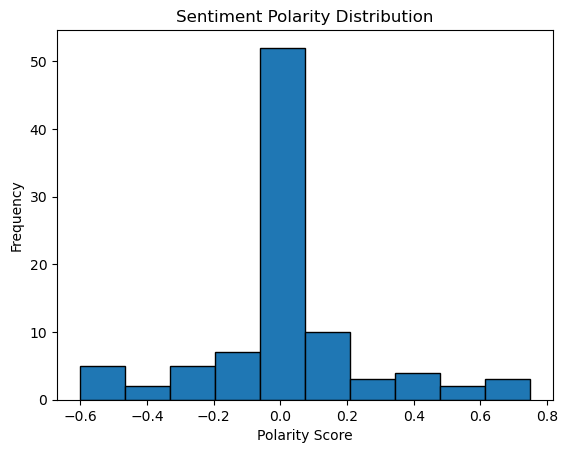

In [34]:
import matplotlib.pyplot as plt
from textblob import TextBlob

# Plotting the histogram
plt.hist(sentiments, bins=10, edgecolor='black')

# Labeling the chart
plt.title('Sentiment Polarity Distribution')
plt.xlabel('Polarity Score')
plt.ylabel('Frequency')

# Displaying the chart
plt.show()
